### 1. Importing the libraries. Loading and preprocessing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score
)

In [2]:
df = pd.read_csv("data.csv")

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

In [4]:
# Checking number of missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [5]:
# Display the summary of the dataset
print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

In [6]:
# Cleaning the dataset by dropping irrelevant and/or na information
df.dropna(axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [7]:
# Converting categorical data to numerical
# Encode target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### 2. Split data into train-test sets and standardize features

In [9]:
# Feature Selection
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [10]:
# # Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
print(f'Training set: {X_train.shape}')
print(f'Testing set: {X_test.shape}')

Training set: (455, 30)
Testing set: (114, 30)


### 3. Fit a LogisticRegression Model

In [13]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# View the model's coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [[ 0.43190368  0.38732553  0.39343248  0.46521006  0.07166728 -0.54016395
   0.8014581   1.11980408 -0.23611852 -0.07592093  1.26817815 -0.18887738
   0.61058302  0.9071857   0.31330675 -0.68249145 -0.17527452  0.3112999
  -0.50042502 -0.61622993  0.87984024  1.35060559  0.58945273  0.84184594
   0.54416967 -0.01611019  0.94305313  0.77821726  1.20820031  0.15741387]]
Intercept: [-0.44558453]


In [15]:
# predicting the test set results in logistic regression model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [16]:
print(y_pred)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]


In [17]:
print(y_prob)

[1.13590250e-01 9.99990991e-01 9.96920905e-01 5.10134225e-04
 6.06389713e-05 1.00000000e+00 9.99999998e-01 9.65096937e-01
 3.79342140e-01 7.59402734e-04 4.98717826e-02 9.87592879e-01
 6.07381873e-03 8.56069117e-01 1.62175599e-03 9.99259818e-01
 1.85245908e-03 1.11662359e-05 8.18375684e-07 9.99998883e-01
 8.41633901e-02 9.74778299e-03 9.99999996e-01 7.89186669e-05
 1.13874333e-03 5.84587240e-04 1.07444521e-03 5.97518345e-03
 2.85311713e-03 9.99991817e-01 5.17409813e-04 1.48760128e-04
 2.16094439e-03 5.49413839e-03 1.40706288e-04 2.42334266e-03
 9.42415985e-01 2.89870352e-03 9.99911214e-01 4.81363757e-02
 7.12433090e-05 9.99593392e-01 2.46640626e-03 9.63884505e-04
 1.99892051e-02 7.15547342e-02 3.98571939e-04 4.90625569e-04
 3.04698010e-02 6.14016147e-04 9.99879654e-01 9.99999947e-01
 3.08211520e-01 1.32293769e-02 2.73627242e-05 9.54524359e-03
 1.12878558e-04 1.00000000e+00 8.35573090e-01 1.39239947e-04
 5.01360363e-03 9.99999551e-01 9.99999999e-01 3.11060472e-02
 8.29093869e-04 1.297992

### 4. Evaluate Logistic Regression Model

In [18]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC: 0.99737962659679


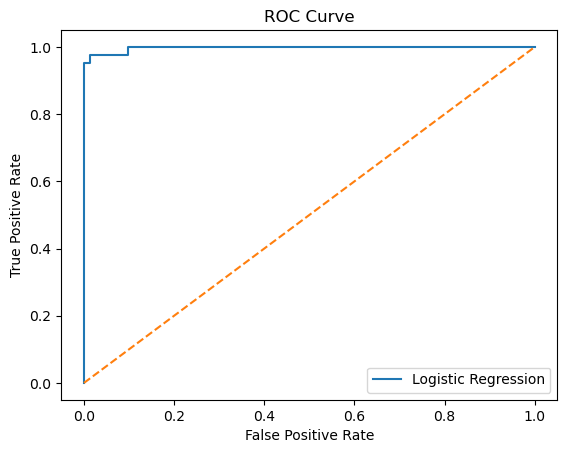

In [19]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 5. Final

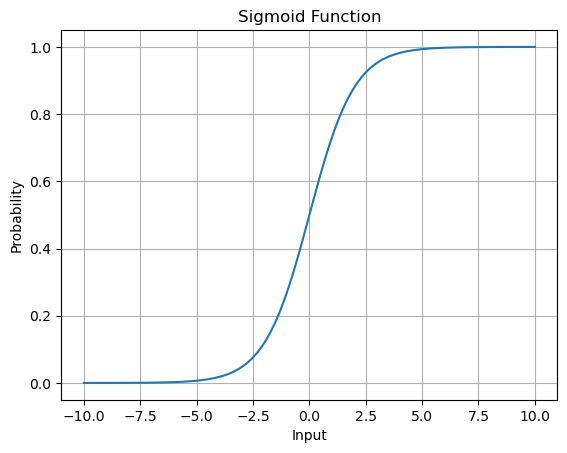

In [20]:
# Visualize Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_vals = np.linspace(-10, 10, 100)
plt.plot(x_vals, sigmoid(x_vals))
plt.title("Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Probability")
plt.grid()
plt.show()

In [21]:
# Threshold Tuning Example
threshold = 0.3  # Try different values like 0.3, 0.5, 0.7
y_custom_thresh = (y_prob >= threshold).astype(int)

print(f"\nConfusion Matrix @ Threshold {threshold}:\n", confusion_matrix(y_test, y_custom_thresh))
print("Precision:", precision_score(y_test, y_custom_thresh))
print("Recall:", recall_score(y_test, y_custom_thresh))


Confusion Matrix @ Threshold 0.3:
 [[67  4]
 [ 1 42]]
Precision: 0.9130434782608695
Recall: 0.9767441860465116
